In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
books = pd.read_csv('books.csv')
users = pd.read_csv('users.csv')
ratings = pd.read_csv('ratings.csv')

C:\Users\admin\AppData\Local\Temp\ipykernel_24996\3819754567.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('books.csv')


In [3]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [4]:
print('Books shape: ',books.shape)
print('Users shape: ',users.shape)
print('Ratings shape: ',ratings.shape)

Books shape:  (271360, 8)
Users shape:  (278858, 3)
Ratings shape:  (1149780, 3)


In [5]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [6]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

- Almost 45% of values of age are missing

In [7]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [8]:
print(books.duplicated().sum())
print(users.duplicated().sum())
print(ratings.duplicated().sum())

0
0
0


# Data Exploration

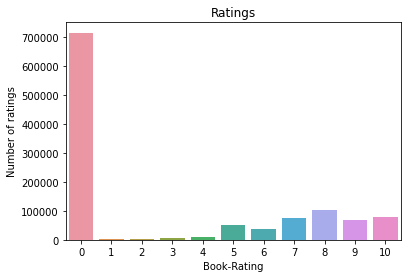

In [9]:
rate_order = [0,1,2,3,4,5,6,7,8,9,10]
sns.countplot(x='Book-Rating', data=ratings, order = rate_order)
plt.title('Ratings')
plt.ylabel('Number of ratings')
plt.show()

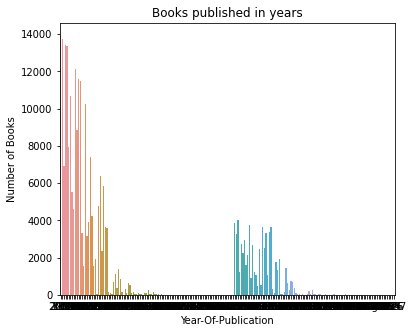

In [10]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 6,5
sns.countplot(x='Year-Of-Publication', data=books)
plt.title('Books published in years')
plt.ylabel('Number of Books')
plt.show()

- Needs Improvement

In [11]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [12]:
books[books['Year-Of-Publication']=='Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [13]:
books[books['Year-Of-Publication']=='DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


Here for 'Gillmard' and 'DK Publishing Inc' Book Author and year of publication have been exchanged.
Now we need to exchange those values

In [14]:
year = books[books['Year-Of-Publication']=='Gallimard']['Year-Of-Publication']
author = books[books['Year-Of-Publication']=='Gallimard']['Book-Author']
books.loc[books['Year-Of-Publication']=='Gallimard','Book-Author'] = author
# books[books['Year-Of-Publication']=='Gallimard']['Book-Author'] = author
# books[books['Year-Of-Publication']=='Gallimard']
books[books['Year-Of-Publication']=='Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


## Conditionally swapping two columns

In [15]:
ary=np.where(books['Year-Of-Publication']=='Gallimard',[books['Year-Of-Publication'],books['Book-Author']],[books['Book-Author'],books['Year-Of-Publication']])
new_df = pd.DataFrame({'Book-Author':ary[0],'Year-Of-Publication':ary[1]})
new_df[new_df['Book-Author']=='Gallimard']

,Book-Author,Year-Of-Publication
220731,Gallimard,2003


In [16]:
books['Book-Author'] = new_df['Book-Author']
books['Year-Of-Publication'] = new_df['Year-Of-Publication']
books[books['Book-Author']=='Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",Gallimard,2003,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [17]:
# Exchanged for 'Gallimard' now for 'DK Publishing Inc'
ary=np.where(books['Year-Of-Publication']=='DK Publishing Inc',[books['Year-Of-Publication'],books['Book-Author']],[books['Book-Author'],books['Year-Of-Publication']])
new_df = pd.DataFrame({'Book-Author':ary[0],'Year-Of-Publication':ary[1]})
new_df[new_df['Book-Author']=='DK Publishing Inc']

,Book-Author,Year-Of-Publication
209538,DK Publishing Inc,2000
221678,DK Publishing Inc,2000


In [18]:
books['Book-Author'] = new_df['Book-Author']
books['Year-Of-Publication'] = new_df['Year-Of-Publication']
books[books['Book-Author']=='DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",DK Publishing Inc,2000,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",DK Publishing Inc,2000,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


Exchanged. Now need to convert 'year of publication' dtypes to numeric

In [19]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype('int')
np.sort(books['Year-Of-Publication'].unique())

array([   0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908,
       1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924,
       1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935,
       1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946,
       1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021,
       2024, 2026, 2030, 2037, 2038, 2050])

- Books in future are not possible. 
- So we will delete the values from datasets when year> 2022

In [20]:
books[books['Year-Of-Publication']==2050]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
80264,0140301690,Alice's Adventures in Wonderland and Through t...,Lewis Carroll,2050,Puffin Books,http://images.amazon.com/images/P/0140301690.0...,http://images.amazon.com/images/P/0140301690.0...,http://images.amazon.com/images/P/0140301690.0...
97826,0140201092,Outline of European Architecture (Pelican S.),Nikolaus Pevsner,2050,Penguin USA,http://images.amazon.com/images/P/0140201092.0...,http://images.amazon.com/images/P/0140201092.0...,http://images.amazon.com/images/P/0140201092.0...


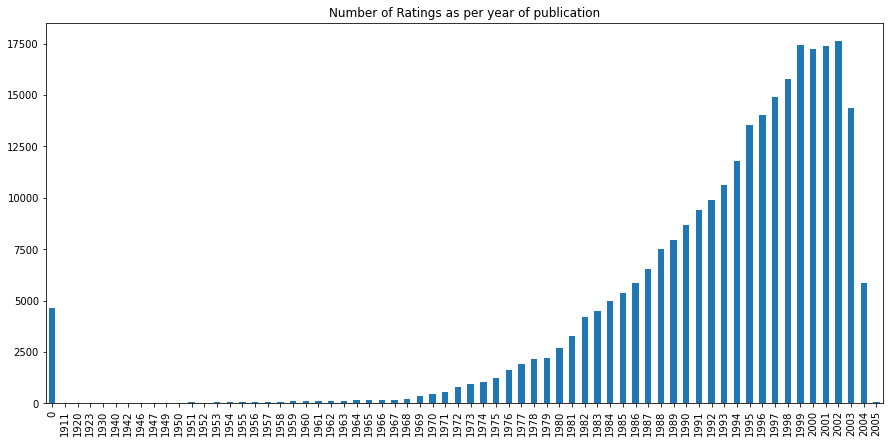

In [21]:
from matplotlib import rcParams
# rcParams['figure.figsize'] = 15,8
count = books["Year-Of-Publication"].value_counts()
count = count[count>10]       # If count > 10
count.sort_index().plot(kind='bar', title="Number of Ratings as per year of publication", figsize=(15,7))
# plt.xticks(count.index.sort_values())
plt.show()

# For sorted x axis
# expeditions['members'].value_counts().sort_index().plot.bar(figsize=(12,8))

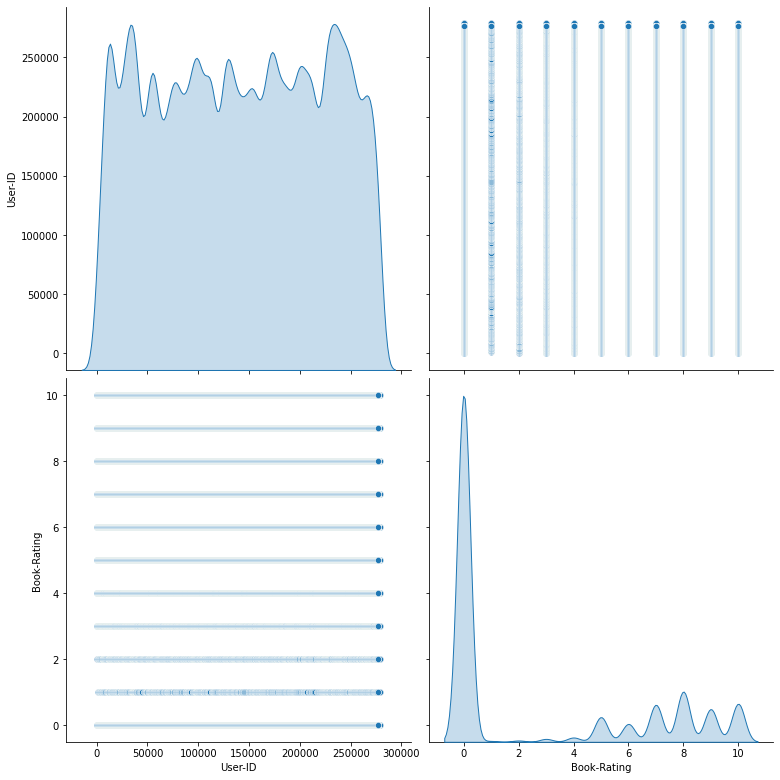

In [22]:
sns.pairplot(ratings, diag_kind = 'kde', height=5.5)

# Popularity Based Recommender System

- For Trending
- We will show 50 Books having maximum average rating
- But minimum number of votes is 250

In [23]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [24]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [25]:
avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_ratings'},inplace=True)
avg_rating_df

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [26]:
popular_df = num_rating_df.merge(avg_rating_df, on='Book-Title')
popular_df.head()

,Book-Title,num_ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00


In [27]:
# Will give books with number of ratings > 250
popular_df[popular_df['num_ratings']>250]

,Book-Title,num_ratings,avg_ratings
764,1984,284,4.454225
818,1st to Die: A Novel,509,3.575639
1048,2nd Chance,356,3.269663
1760,A Bend in the Road,346,3.364162
2281,"A Child Called \It\"": One Child's Courage to S...",265,4.086792
...,...,...,...
233850,White Oleander : A Novel,387,3.506460
233851,White Oleander : A Novel (Oprah's Book Club),356,3.772472
234740,Wicked: The Life and Times of the Wicked Witch...,326,3.766871
234951,Wild Animus,2502,1.019584


In [28]:
# books with total votes>250.---> Then sorting on avg_ratings.---> Then choosing top 50. ---> We only need 50 books to display.
# So we can replace popular_df with 50 books
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_ratings',ascending=False).head(50)

- Now we want the name of the **authors**, **image** and if possible name of **publisher** for these books

In [29]:
popular_df.merge(books, on='Book-Title')

,Book-Title,num_ratings,avg_ratings,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
1,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136369,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...
2,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0786222743,J. K. Rowling,2000,Thorndike Press,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
4,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139600,J. K. Rowling,2002,Scholastic Paperbacks,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...
...,...,...,...,...,...,...,...,...,...,...
191,Lord of the Flies,259,3.818533,0698102193,William G. Golding,1978,Putnam Pub Group,http://images.amazon.com/images/P/0698102193.0...,http://images.amazon.com/images/P/0698102193.0...,http://images.amazon.com/images/P/0698102193.0...
192,A Prayer for Owen Meany,413,3.796610,0345361792,John Irving,1990,Ballantine Books,http://images.amazon.com/images/P/0345361792.0...,http://images.amazon.com/images/P/0345361792.0...,http://images.amazon.com/images/P/0345361792.0...
193,A Prayer for Owen Meany,413,3.796610,0345363523,John Irving,1989,Ballantine Books,http://images.amazon.com/images/P/0345363523.0...,http://images.amazon.com/images/P/0345363523.0...,http://images.amazon.com/images/P/0345363523.0...
194,"The Vampire Lestat (Vampire Chronicles, Book II)",301,3.777409,0345313860,ANNE RICE,1986,Ballantine Books,http://images.amazon.com/images/P/0345313860.0...,http://images.amazon.com/images/P/0345313860.0...,http://images.amazon.com/images/P/0345313860.0...


Now 196 rows and our popular_df had only 50 rows. It is because books dataset have same bookname but different ISBN
- We don't need ISBN number so we can easily drop duplicates of book titles

In [30]:
popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title').shape

(50, 10)

- Now 50 books only.
- Now we need only Book title, book author, year, image url, num_ratings, avg_ratings

In [31]:
# Now will incorporate the changes in popular_df
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','num_ratings','avg_ratings','Image-URL-M']]

In [32]:
popular_df.head()

,Book-Title,Book-Author,num_ratings,avg_ratings,Image-URL-M
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,428,5.852804,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,387,5.824289,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,278,5.737410,http://images.amazon.com/images/P/0590353403.0...
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,347,5.501441,http://images.amazon.com/images/P/043935806X.0...
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,556,5.183453,http://images.amazon.com/images/P/0439064872.0...


# Collaborative Filtering Based Recommender System
- Here we will make a dataframe with user_id as columns. For e.g. if 10000 user_ids then 10000 columns. For good recommendation system we will only choose experienced users i.e. users that have rated atleast say 50 or 100 or 200 books
- Our dataframe will have books as rows or index. Now we will choose only those books who have been rated by more than say 20, 50, 100 users.
- These number of ratings for users and for books will be selected by iteration/ trial and error.

In [33]:
# selecting knowledgeable users
x = ratings_with_name.groupby('User-ID').count()['Book-Rating']
x[x>200]  # around 811 users with more than 200 ratings
padhe_likhe_users = x[x>200].index
padhe_likhe_users

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=811)

In [34]:
filtered_ratings = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]

These 811 users have rated around 474007 books

In [35]:
# filtered_ratings.groupby('Book-Title').count()['Book-Rating']

# Now selecting those books which have more than 50 ratings
y = filtered_ratings.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [36]:
famous_books    # 706

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [37]:
final_ratings = filtered_ratings[filtered_ratings['Book-Title'].isin(famous_books)]

In [38]:
final_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...


In [39]:
# final_ratings.drop_duplicates()
final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating') # making another table with book title in index, user_id in columns and ratings they gave as value

# now saving this table in new table named pt
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [40]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [41]:
# Filling null values by 0
pt.fillna(0, inplace=True)

In [42]:
pt.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- 706 rows in pt. So 706 books. Now each book is represented by 810 values in array. Each book has now become a vector of 810 dimensional space
- Now since each book is a vector. We can find distances between each vector. 
- These distances in our recommendation system are their closeness with other books. Less distance means more similar book
- Here we are using **cosine similarity** as criteria for similarity between books

In [43]:
from sklearn.metrics.pairwise import cosine_similarity

In [44]:
cosine_similarity(pt)  # 2x2 array and not dataframe
similarity_scores = cosine_similarity(pt)

In [45]:
similarity_scores # 2x2 array. We found euclidean distance of each book with others

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

- Now we will make a function that will give 5 books as output based on similarity scores when we input name of a book
- First we will fetch index from book name
- After finding index we will enter in similarity score at that index and find distances. For eg similarity_scores[67]  gives the similarity score of 68th book with other books
- We will enumerate it so that we also gets the index along with distance. command--- list(enumerate(similarity_scores[67]))
- Will sort it by sorted(list(enumerate(similarity_scores[67]))) --- But it will sort as per index. But we want sorting as per ratings. 
- For that we use sorted(list(enumerate(similarity_scores[67])),key=lambda x:x[1])
- sorted(list(enumerate(similarity_scores[67])),key=lambda x:x[1], reverse=True). reverse=True will arrange in decreasing order
- sorted(list(enumerate(similarity_scores[67])),key=lambda x:x[1])[1:6] ----- [1:6] is used because at 0th position that book itself will be there and 1:6 will return 5 books. Now store this in similar items

In [46]:
# to fetch index use np.where(pt.index=='1984')  In place of 1984 we can use other book name also. This will give 2x2 as output and by using [0][0] we can get actual value of index
np.where(pt.index=='Zoya')[0][0]

704

In [47]:
list(enumerate(similarity_scores[67]))  # This gives the similarity score of 68th book with other books
sorted(list(enumerate(similarity_scores[67])))
sorted(list(enumerate(similarity_scores[67])),key=lambda x:x[1]) # Now sorted as per ratings
sorted(list(enumerate(similarity_scores[67])),key=lambda x:x[1], reverse=True) # sorting in decreasing order
sorted(list(enumerate(similarity_scores[67])),key=lambda x:x[1])[1:6]   # will give 5 book index

[(3, 0.0), (4, 0.0), (5, 0.0), (6, 0.0), (7, 0.0)]

In [52]:
# def recommend(book_name):
#     # index fetch
#     index = np.where(pt.index==book_name)[0][0]
#     similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
#     for i in similar_items:
#         # print(i[0])   # will return the indexes of similar books
#         print(pt.index[i[0]])   # will return book name of similar books

In [58]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [55]:
popular_df['Image-URL-M'][5]

'http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg'

In [59]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg']]

In [54]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [60]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))